# Pandas and Seaborn based homework

DSE5002
Carrie Beauzile-Milinazzo

We will be working with the heart.csv data set

https://www.kaggle.com/fedesoriano/heart-failure-prediction?select=heart.csv
    
using tools in pandas and seaborn,  and ideas from the two Jupyter notebooks we've seen this week



In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
# import p9 as
# ^ whut?

In [34]:
# make sure heart.csv is in your current working directory, or list the full path name in the variable infile

infile="heart.csv"

bp_df=pd.read_csv(infile)
bp_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Find or create the following

a.) -Find the dimensions,   memory used, and other basic information

b.) -Run the data summary

c.) Change the appropriate variables to type Categorical

d.) -Create a pivot table (using the Pandas groupby operation) showing mean Resting BP by Sex, Resting ECG and HeartDisease-What does this tell you? What else can you figure out using a Pivot table, show me two other helpful pivot tables based on different variables, different groupings or different aggregation functions (count, mean, max etc)

e.) -Show a histogram and the ECDF  (empirical cumulative distribution function) for several continuous variables in the data set,   in broad 
    terms, what do the distributions look like,  normal? exponential, poison-like?, uniform?   Does this match your expectations?

    https://seaborn.pydata.org/generated/seaborn.ecdfplot.html
    https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ecdf.html
    

f.) -Show An SNS Pairplot,   the most informative version you can find,   set the hue based on Heart Disease,  try using at least one
other variable as the Hue.  Discuss what you think you are seeing in this plot


Create all these results in this Notebook and turn it in

In [35]:
# a.) -Find the dimensions, memory used, and other basic information

print(bp_df.shape)

(918, 12)


In [36]:
# b.) -Run the data summary

data_summary = bp_df.describe()
print(data_summary)

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [37]:
# c.) Change the appropriate variables to type Categorical

bp_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [38]:
# Makes sense to make Sex, ChestPainType, RestingECG, ExerciseAngina & ST_Slope categorical
# So basically, all of the 'object' types

bp_df['Sex']=pd.Categorical(bp_df.Sex)
bp_df['ChestPainType']=pd.Categorical(bp_df.ChestPainType)
bp_df['RestingECG']=pd.Categorical(bp_df.RestingECG)
bp_df['ExerciseAngina']=pd.Categorical(bp_df.ExerciseAngina)
bp_df['ST_Slope']=pd.Categorical(bp_df.ST_Slope)

bp_df.dtypes

Age                  int64
Sex               category
ChestPainType     category
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG        category
MaxHR                int64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease         int64
dtype: object

In [39]:
"""
d.) Create a pivot table (using the Pandas groupby operation) showing mean Resting BP by Sex, Resting ECG and 
HeartDisease-What does this tell you? What else can you figure out using a Pivot table, show me two other helpful 
pivot tables based on different variables, different groupings or different aggregation functions (count, mean, 
max, etc.)
"""

pd.melt(bp_df, id_vars=['Sex', 'RestingECG', 'HeartDisease'], value_vars=['RestingBP'])

,Sex,RestingECG,HeartDisease,variable,value
0,M,Normal,0,RestingBP,140
1,F,Normal,1,RestingBP,160
2,M,ST,0,RestingBP,130
3,F,Normal,1,RestingBP,138
4,M,Normal,0,RestingBP,150
...,...,...,...,...,...
913,M,Normal,1,RestingBP,110
914,M,Normal,1,RestingBP,144
915,M,Normal,1,RestingBP,130
916,F,LVH,1,RestingBP,130


In [40]:
# Alternatively

pd.melt(bp_df, id_vars=['RestingBP'], value_vars=['Sex', 'RestingECG', 'HeartDisease'])

,RestingBP,variable,value
0,140,Sex,M
1,160,Sex,F
2,130,Sex,M
3,138,Sex,F
4,150,Sex,M
...,...,...,...
2749,110,HeartDisease,1
2750,144,HeartDisease,1
2751,130,HeartDisease,1
2752,130,HeartDisease,1


Altogether, this isn't telling me a whole lot, just because it's so long, and there's so many variables. It might be better to break it out.

In [41]:
pd.melt(bp_df, id_vars=['Sex'], value_vars=['RestingBP'])

# This is better, but still not very informative. A LOT of data to try and take in.
# Mean would be more informative.

,Sex,variable,value
0,M,RestingBP,140
1,F,RestingBP,160
2,M,RestingBP,130
3,F,RestingBP,138
4,M,RestingBP,150
...,...,...,...
913,M,RestingBP,110
914,M,RestingBP,144
915,M,RestingBP,130
916,F,RestingBP,130


In [42]:
# Mean

bp_df.groupby('Sex', observed=True)['RestingBP'].mean()

# We can see that the average RestingBP for males is higher (slightly).
# It may be worth investigating further to see if this difference is statistically significant.

Sex
F    132.212435
M    132.445517
Name: RestingBP, dtype: float64

(array([  1.,   0.,   0.,   0.,  12., 148., 430., 234.,  73.,  20.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

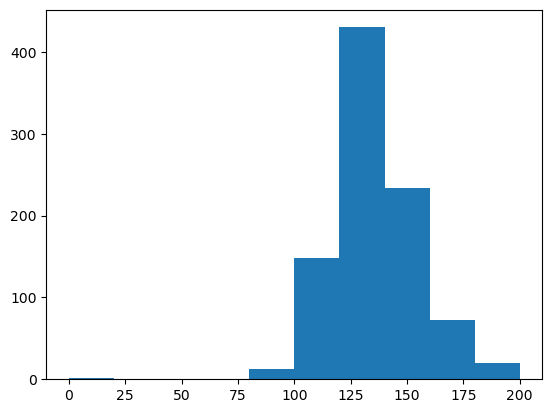

In [43]:
"""
e.) Show a histogram and the ECDF (empirical cumulative distribution function) for several continuous variables 
in the data set, in broad terms, what do the distributions look like, normal? exponential, poison-like?, uniform?
Does this match your expectations?
"""

# regular histogram

import matplotlib.pyplot as plt
plt.hist(bp_df.RestingBP)

# This distribution looks kind of normal, but more positively skewed.
# I would expect something like resting BP to be normally distributed.
# This dataset may not be representative of the entire population.

<Axes: xlabel='RestingBP', ylabel='Count'>

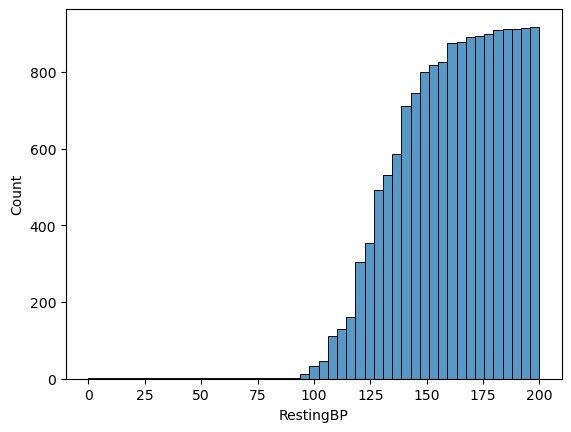

In [44]:
# ECDF

sns.histplot(bp_df,x="RestingBP",cumulative=True)

# The steeper slope here indicates that a large number of individuals have Resting BP
# between about 120 and 150. The median appears to be somewhere around 130, which matches
# what is shown in the histogram.

(array([725.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 193.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

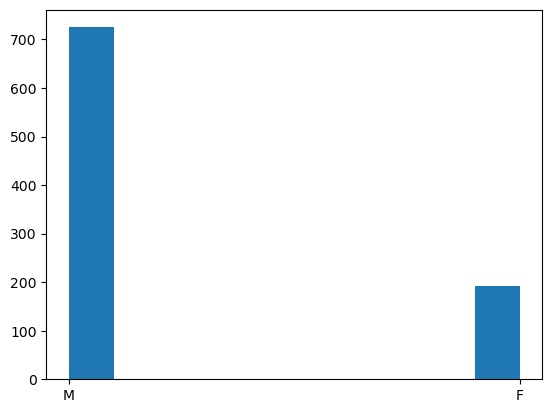

In [45]:
# I want to see if the sexes are even here

plt.hist(bp_df.Sex)
# There are very clearly a lot more males in this dataset than females, which is good to 
# keep in mind when making any interpretations.
# If this dataset only includes individuals who went to the doctor/hospital for chest
# pain or heart problems, this would suggest that these issues are more common in men 
# than in women.

(array([172.,   6.,  70., 319., 248.,  81.,  14.,   3.,   3.,   2.]),
 array([  0. ,  60.3, 120.6, 180.9, 241.2, 301.5, 361.8, 422.1, 482.4,
        542.7, 603. ]),
 <BarContainer object of 10 artists>)

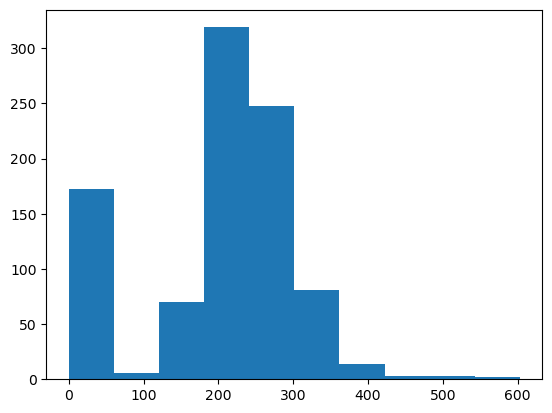

In [46]:
# Let's do Cholesterol

plt.hist(bp_df.Cholesterol)

# This distribution suggests that cholesterol is probably not directly correlated with 
# chest pain. It seems like it could be a normal distribution, but there is a big chunk
# missing in the middle.

<Axes: xlabel='Cholesterol', ylabel='Count'>

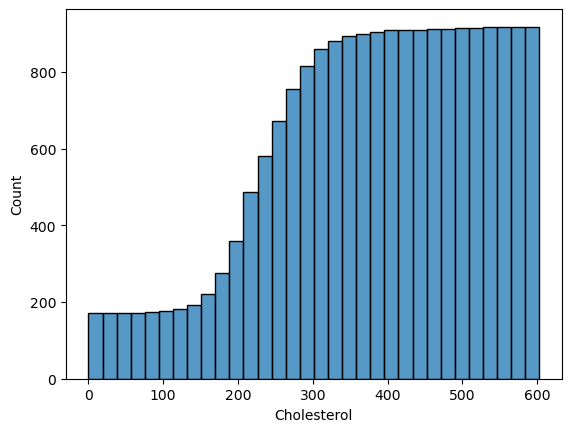

In [47]:
# ECDF

sns.histplot(bp_df,x="Cholesterol",cumulative=True)

# This is interesting. The ECDF starts to rise around Cholesterol levels of 100-150, 
# indicating that some individuals have cholesterol levels in this range.
# However, the slope is relatively gentle initially, meaning the number of observations 
# in this lower range is not very high compared to the rest of the distribution.
# There is a very steep upward slope between approximately Cholesterol levels of 
# 180 and 300. This indicates that a large proportion of the data points have 
# Cholesterol values within this range. 

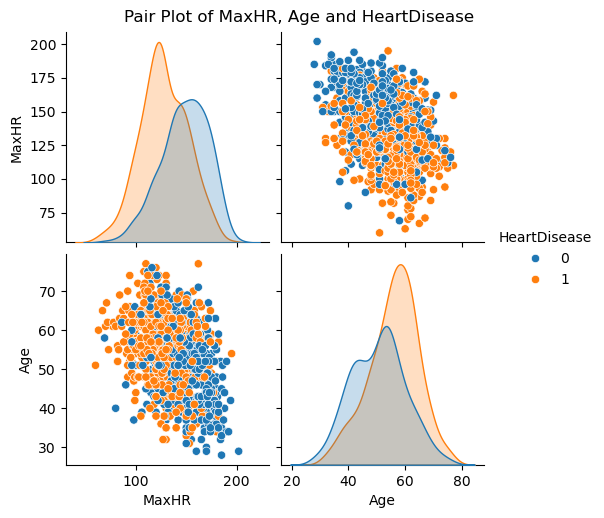

In [48]:
"""
f.) Show An SNS Pairplot, the most informative version you can find, set the hue based on Heart Disease,
try using at least one other variable as the Hue. Discuss what you think you are seeing in this plot
"""
import seaborn as sns

sns.pairplot(bp_df[['MaxHR', 'Age', 'HeartDisease']], hue='HeartDisease')
plt.suptitle("Pair Plot of MaxHR, Age and HeartDisease", y=1.02)
plt.show()

* Based on these results, it looks like age is positively correlated with HeartDisease. The older an individual is, the more likely they are to have heart disease.
* MaxHR appears to be negatively correlated, and it makes sense that people with heart disease would tend to have a lower maximum heart rate.
* The relationship between MaxHR and Age shows that as age increases, maximum heart rate tends to decrease. We see this in the scatterplots, which show the same information, just with axes switched.

g.) Create several useful or informative boxplots of continuous variables by category, using Seaborn or PlotNine.   Find an interesting result or contrast 
among the variables,   discuss what you think it means or implies

h.) Create violin plots of these same results

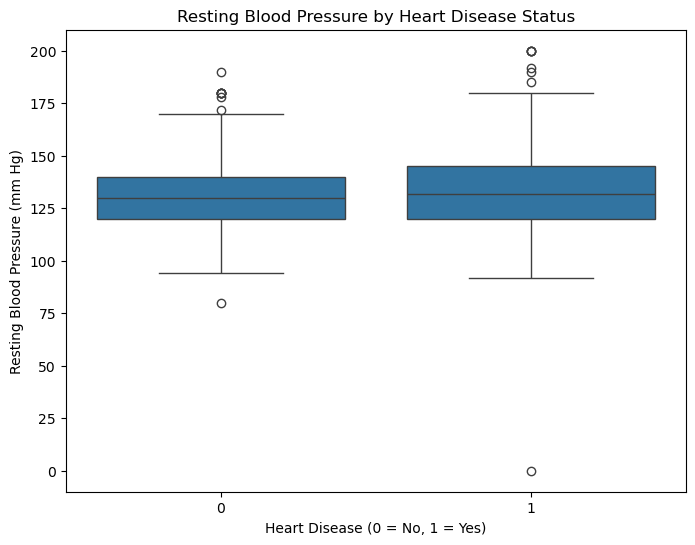

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='RestingBP', data=bp_df)
plt.title('Resting Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

# This shows that resting blood pressure tends to trend higher for people with heart disease

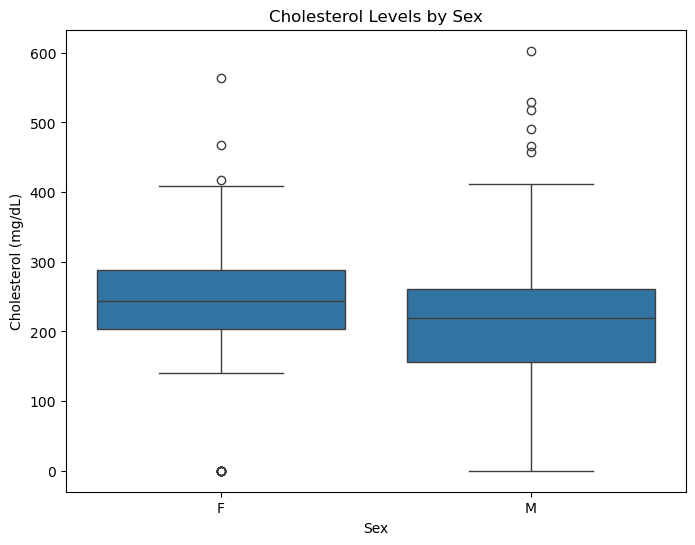

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Cholesterol', data=bp_df)
plt.title('Cholesterol Levels by Sex')
plt.xlabel('Sex')
plt.ylabel('Cholesterol (mg/dL)')
plt.show()

# This shows that there is a much wider variation in cholesterol level in males.
# However, this may be because there are many more males in the dataset than females.

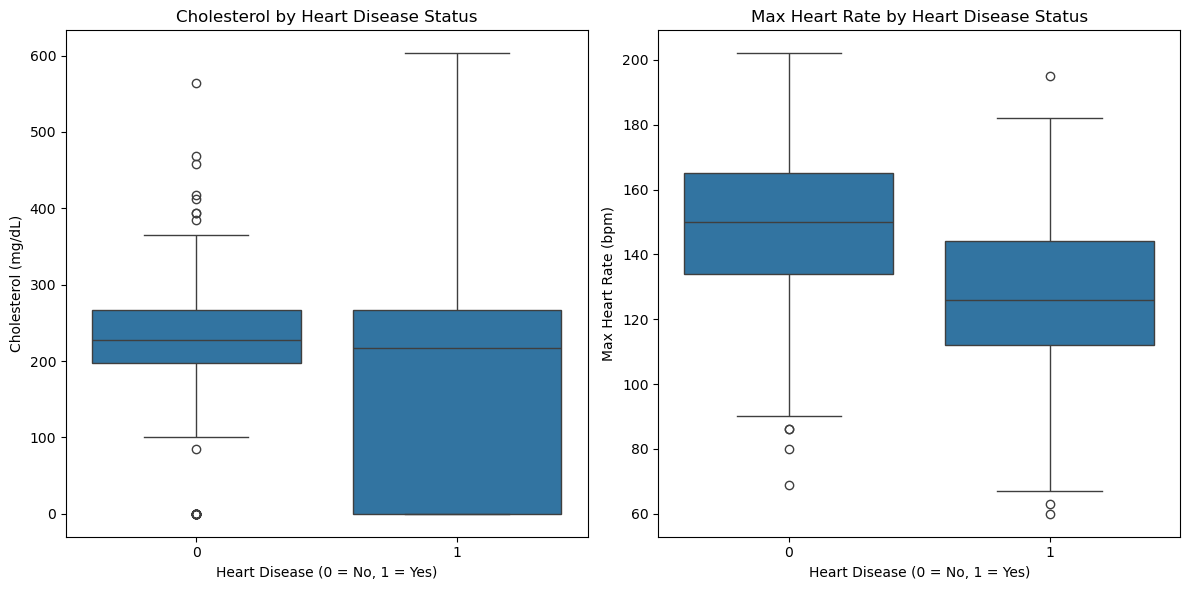

In [51]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='HeartDisease', y='Cholesterol', data=bp_df)
plt.title('Cholesterol by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol (mg/dL)')

plt.subplot(1, 2, 2)
sns.boxplot(x='HeartDisease', y='MaxHR', data=bp_df)
plt.title('Max Heart Rate by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Max Heart Rate (bpm)')

plt.tight_layout()
plt.show()

# It seems like those with heart disease have a much wider range of cholesterol values.
# I would expect them to have higher cholesterol. Maybe there is a problem with the data?
# Maybe there's a lot of people who are on cholesterol medication who have heart disease, 
# and so that would account for the significant low values?

# The boxplots for MaxHR support what we saw above, with individuals with heart disease
# generally having lower max heart rates.

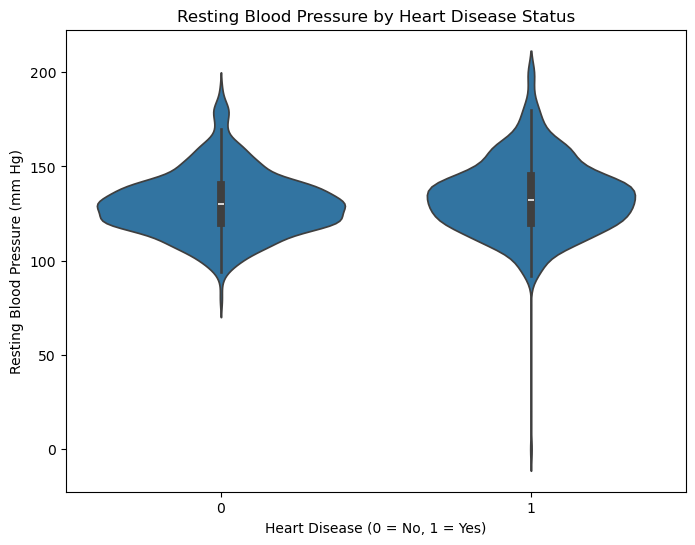

In [52]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='HeartDisease', y='RestingBP', data=bp_df)
plt.title('Resting Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

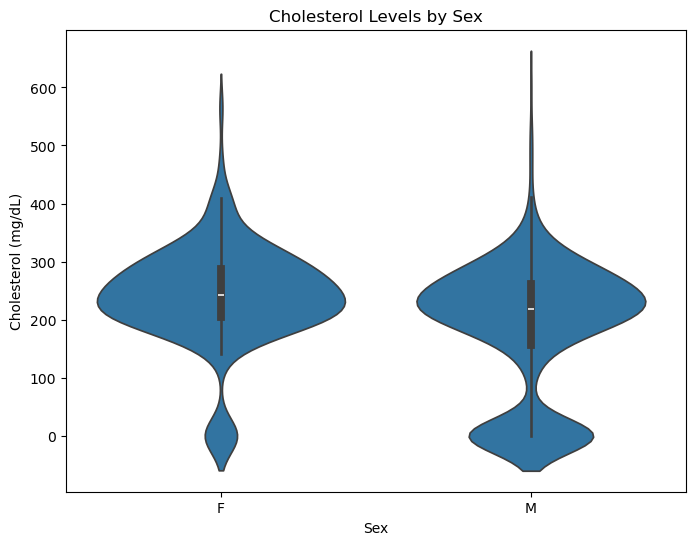

In [53]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Sex', y='Cholesterol', data=bp_df)
plt.title('Cholesterol Levels by Sex')
plt.xlabel('Sex')
plt.ylabel('Cholesterol (mg/dL)')
plt.show()

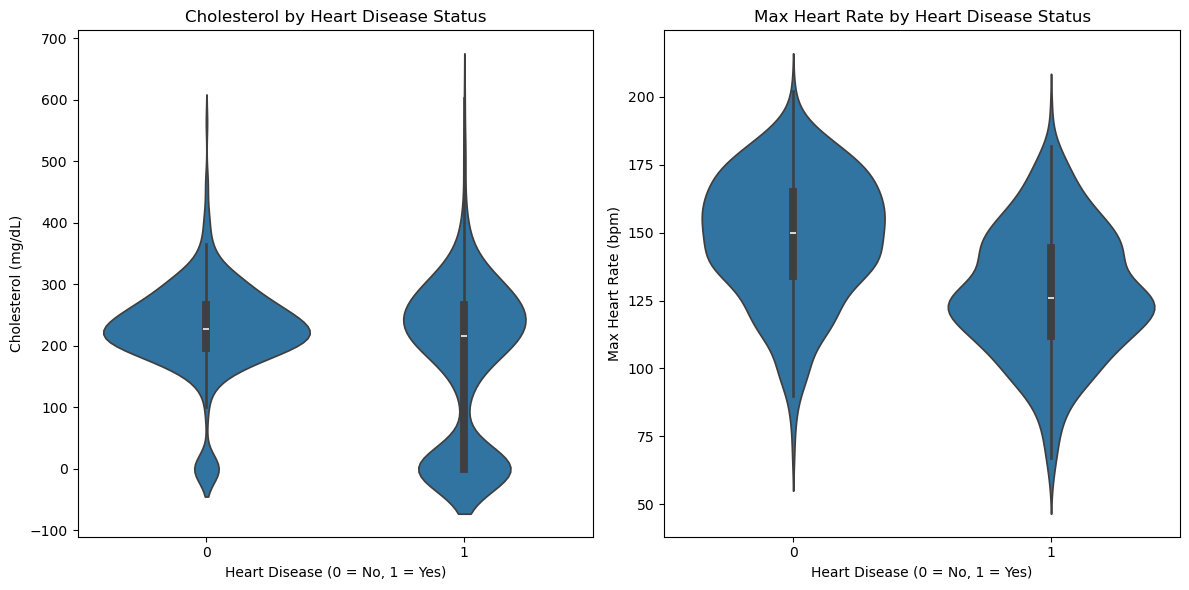

In [54]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='HeartDisease', y='Cholesterol', data=bp_df)
plt.title('Cholesterol by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol (mg/dL)')

plt.subplot(1, 2, 2)
sns.violinplot(x='HeartDisease', y='MaxHR', data=bp_df)
plt.title('Max Heart Rate by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Max Heart Rate (bpm)')

plt.tight_layout()
plt.show()

1.) Find the mean, median and standard deviation of the Max heartrate variable in this data set

Turn this into a pivot table,   grouping by one or more predictors.   

In [55]:
mean_maxhr = bp_df['MaxHR'].mean()
median_maxhr = bp_df['MaxHR'].median()
std_maxhr = bp_df['MaxHR'].std()

print(f"Avg Max HR: {mean_maxhr:.2f}")
print(f"Median of Max HR: {median_maxhr:.2f}")
print(f"Standard Deviation of Max HR: {std_maxhr:.2f}")

Avg Max HR: 136.81
Median of Max HR: 138.00
Standard Deviation of Max HR: 25.46


In [56]:
# Pivot table
pivot_table_heartdisease = pd.pivot_table(bp_df,
                                        values='MaxHR',
                                        index='HeartDisease',
                                        aggfunc=['mean', 'median', 'std'])

print("\nPivot Table of MaxHR Statistics by HeartDisease:")
print(pivot_table_heartdisease)


Pivot Table of MaxHR Statistics by HeartDisease:
                    mean median        std
                   MaxHR  MaxHR      MaxHR
HeartDisease                              
0             148.151220  150.0  23.288067
1             127.655512  126.0  23.386923


In [57]:
# Adding in Sex (keeping in mind that the data for males should hold more weight in an interpretation than that for females)
if 'Sex' in bp_df.columns:
    pivot_table_heartdisease_sex = pd.pivot_table(bp_df,
                                                values='MaxHR',
                                                index=['HeartDisease', 'Sex'],
                                                aggfunc=['mean', 'median', 'std'],
                                                 observed=False)
    print("\nPivot Table of MaxHR Statistics by HeartDisease and Sex:")
    print(pivot_table_heartdisease_sex)
else:
    print("\nNote: No 'Sex' column found in the DataFrame to create the second pivot table.")

# Interestingly, it seems like the impact of heart disease on men's MaxHR is more sever than for women


Pivot Table of MaxHR Statistics by HeartDisease and Sex:
                        mean median        std
                       MaxHR  MaxHR      MaxHR
HeartDisease Sex                              
0            F    149.048951  152.0  21.597903
             M    147.670412  150.0  24.170369
1            F    137.820000  142.5  21.820876
             M    126.545852  125.0  23.306611
